In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron
from statsmodels.tsa.stattools import zivot_andrews
from statsmodels.tsa.ardl import ARDL, ardl_select_order

In [3]:
df=pd.read_excel("C:\\Users\\KIIT\\Documents\\All_research\\HDI_CO2_etc\\final_dataset.xlsx")
df

,year,CO2,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP,Mobile cellular subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),RE,NRE,TO,HDI
0,1990,0.690076,7.053350,8.452911,534.484100,0.000000,0.000000,0.000000,53.0,53.763960,0.029012,0.434
1,1991,0.727121,8.494241,8.493486,528.898177,0.000000,0.000000,0.000000,52.0,55.063492,0.032119,0.437
2,1992,0.737843,8.842927,9.590172,546.441021,0.000000,0.000000,0.000111,51.5,56.070282,0.033733,0.442
3,1993,0.755372,9.834217,9.817322,560.798572,0.000000,0.000000,0.000218,51.5,56.956834,0.035042,0.446
4,1994,0.786911,9.888085,10.190059,586.175458,0.000000,0.000000,0.001070,50.5,58.014550,0.034253,0.452
5,1995,0.825943,10.843968,12.023481,618.139288,0.007952,0.000000,0.026229,49.5,59.987942,0.036994,0.458
6,1996,0.847662,10.385169,11.544319,651.958357,0.033354,0.000000,0.046334,49.1,60.825156,0.033636,0.465
7,1997,0.875638,10.690717,11.928670,665.466108,0.087978,0.000000,0.070768,47.9,61.773290,0.033990,0.471
8,1998,0.881704,11.018469,12.681001,693.408505,0.117031,0.000000,0.139027,48.0,62.015818,0.034178,0.477
9,1999,0.924180,11.452065,13.363533,740.916233,0.181097,0.000000,0.273224,47.1,63.460400,0.033493,0.485


In [4]:
def fill_missing_with_regression(df, target_column, year_column='year'):
    mask_missing = df[target_column].isna()
    mask_not_missing = ~mask_missing

    X_train = df.loc[mask_not_missing, year_column].values.reshape(-1, 1)
    y_train = df.loc[mask_not_missing, target_column].values
    X_missing = df.loc[mask_missing, year_column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)
    df.loc[mask_missing, target_column] = model.predict(X_missing)
    return df

df = fill_missing_with_regression(df, target_column='RE')
df = fill_missing_with_regression(df, target_column='NRE')
#df.to_csv('C:\\Users\\KIIT\\Documents\\All_research\\HDI_CO2_etc\\updates_data.csv')
df

,year,CO2,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP,Mobile cellular subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),RE,NRE,TO,HDI
0,1990,0.690076,7.053350,8.452911,534.484100,0.000000,0.000000,0.000000,53.000000,53.763960,0.029012,0.434
1,1991,0.727121,8.494241,8.493486,528.898177,0.000000,0.000000,0.000000,52.000000,55.063492,0.032119,0.437
2,1992,0.737843,8.842927,9.590172,546.441021,0.000000,0.000000,0.000111,51.500000,56.070282,0.033733,0.442
3,1993,0.755372,9.834217,9.817322,560.798572,0.000000,0.000000,0.000218,51.500000,56.956834,0.035042,0.446
4,1994,0.786911,9.888085,10.190059,586.175458,0.000000,0.000000,0.001070,50.500000,58.014550,0.034253,0.452
5,1995,0.825943,10.843968,12.023481,618.139288,0.007952,0.000000,0.026229,49.500000,59.987942,0.036994,0.458
6,1996,0.847662,10.385169,11.544319,651.958357,0.033354,0.000000,0.046334,49.100000,60.825156,0.033636,0.465
7,1997,0.875638,10.690717,11.928670,665.466108,0.087978,0.000000,0.070768,47.900000,61.773290,0.033990,0.471
8,1998,0.881704,11.018469,12.681001,693.408505,0.117031,0.000000,0.139027,48.000000,62.015818,0.034178,0.477
9,1999,0.924180,11.452065,13.363533,740.916233,0.181097,0.000000,0.273224,47.100000,63.460400,0.033493,0.485


In [5]:
# Apply logarithmic transformation, ignoring zeros
columns_to_transform = [
    'GDP',
    'RE',
    'NRE',
]

for column in columns_to_transform:
    df[column] = np.log(df[column])
display(df)


,year,CO2,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP,Mobile cellular subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),RE,NRE,TO,HDI
0,1990,0.690076,7.053350,8.452911,6.281302,0.000000,0.000000,0.000000,3.970292,3.984603,0.029012,0.434
1,1991,0.727121,8.494241,8.493486,6.270796,0.000000,0.000000,0.000000,3.951244,4.008487,0.032119,0.437
2,1992,0.737843,8.842927,9.590172,6.303426,0.000000,0.000000,0.000111,3.941582,4.026606,0.033733,0.442
3,1993,0.755372,9.834217,9.817322,6.329362,0.000000,0.000000,0.000218,3.941582,4.042294,0.035042,0.446
4,1994,0.786911,9.888085,10.190059,6.373619,0.000000,0.000000,0.001070,3.921973,4.060694,0.034253,0.452
5,1995,0.825943,10.843968,12.023481,6.426714,0.007952,0.000000,0.026229,3.901973,4.094144,0.036994,0.458
6,1996,0.847662,10.385169,11.544319,6.479981,0.033354,0.000000,0.046334,3.893859,4.108003,0.033636,0.465
7,1997,0.875638,10.690717,11.928670,6.500488,0.087978,0.000000,0.070768,3.869116,4.123471,0.033990,0.471
8,1998,0.881704,11.018469,12.681001,6.541619,0.117031,0.000000,0.139027,3.871201,4.127389,0.034178,0.477
9,1999,0.924180,11.452065,13.363533,6.607888,0.181097,0.000000,0.273224,3.852273,4.150416,0.033493,0.485


In [6]:
df['ICT']=(df['Mobile cellular subscriptions (per 100 people)']+
                   df['Fixed broadband subscriptions (per 100 people)']+
                   df['Individuals using the Internet (% of population)'])/3

In [7]:
df

,year,CO2,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP,Mobile cellular subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),RE,NRE,TO,HDI,ICT
0,1990,0.690076,7.053350,8.452911,6.281302,0.000000,0.000000,0.000000,3.970292,3.984603,0.029012,0.434,0.000000
1,1991,0.727121,8.494241,8.493486,6.270796,0.000000,0.000000,0.000000,3.951244,4.008487,0.032119,0.437,0.000000
2,1992,0.737843,8.842927,9.590172,6.303426,0.000000,0.000000,0.000111,3.941582,4.026606,0.033733,0.442,0.000037
3,1993,0.755372,9.834217,9.817322,6.329362,0.000000,0.000000,0.000218,3.941582,4.042294,0.035042,0.446,0.000073
4,1994,0.786911,9.888085,10.190059,6.373619,0.000000,0.000000,0.001070,3.921973,4.060694,0.034253,0.452,0.000357
5,1995,0.825943,10.843968,12.023481,6.426714,0.007952,0.000000,0.026229,3.901973,4.094144,0.036994,0.458,0.011394
6,1996,0.847662,10.385169,11.544319,6.479981,0.033354,0.000000,0.046334,3.893859,4.108003,0.033636,0.465,0.026563
7,1997,0.875638,10.690717,11.928670,6.500488,0.087978,0.000000,0.070768,3.869116,4.123471,0.033990,0.471,0.052915
8,1998,0.881704,11.018469,12.681001,6.541619,0.117031,0.000000,0.139027,3.871201,4.127389,0.034178,0.477,0.085353
9,1999,0.924180,11.452065,13.363533,6.607888,0.181097,0.000000,0.273224,3.852273,4.150416,0.033493,0.485,0.151440


In [8]:
x=df[['GDP','RE','NRE','TO','HDI','ICT']].values
y=df['CO2'].values
features=df[['GDP','RE','NRE','TO','HDI','ICT','CO2']]
features

,GDP,RE,NRE,TO,HDI,ICT,CO2
0,6.281302,3.970292,3.984603,0.029012,0.434,0.000000,0.690076
1,6.270796,3.951244,4.008487,0.032119,0.437,0.000000,0.727121
2,6.303426,3.941582,4.026606,0.033733,0.442,0.000037,0.737843
3,6.329362,3.941582,4.042294,0.035042,0.446,0.000073,0.755372
4,6.373619,3.921973,4.060694,0.034253,0.452,0.000357,0.786911
5,6.426714,3.901973,4.094144,0.036994,0.458,0.011394,0.825943
6,6.479981,3.893859,4.108003,0.033636,0.465,0.026563,0.847662
7,6.500488,3.869116,4.123471,0.033990,0.471,0.052915,0.875638
8,6.541619,3.871201,4.127389,0.034178,0.477,0.085353,0.881704
9,6.607888,3.852273,4.150416,0.033493,0.485,0.151440,0.924180


In [9]:
features.describe()

,GDP,RE,NRE,TO,HDI,ICT,CO2
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,6.926941,3.716528,4.207378,0.034008,0.541485,14.714669,1.239944
std,0.446262,0.176098,0.113843,0.007686,0.072057,16.280935,0.411245
min,6.270796,3.405690,3.984603,0.020524,0.434000,0.000000,0.690076
25%,6.541619,3.552487,4.127389,0.029012,0.477000,0.085353,0.881704
50%,6.916385,3.765840,4.201788,0.034178,0.541000,5.721724,1.107472
75%,7.306551,3.869116,4.298332,0.039786,0.611000,28.971239,1.661916
max,7.648845,3.970292,4.383559,0.049070,0.644000,42.802099,1.900286


In [10]:
features.isna().sum()

GDP    0
RE     0
NRE    0
TO     0
HDI    0
ICT    0
CO2    0
dtype: int64

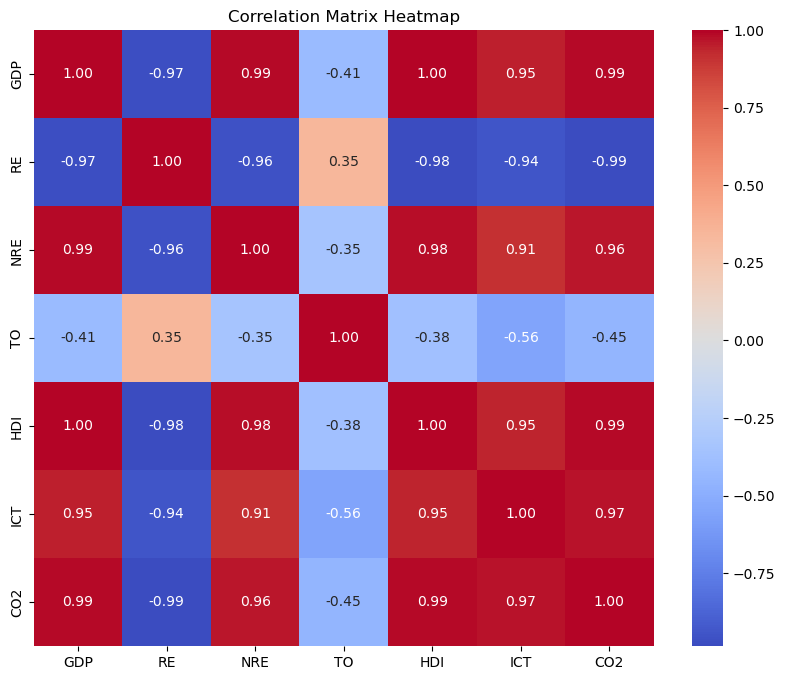

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Unit root test and unit root test with structural break

In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result[1]  # p-value

# Function to perform KPSS test
def kpss_test(series):
    result = kpss(series, regression='c', nlags='auto')
    return result[1]  # p-value

# Function to perform PP test
def pp_test(series):
    result = PhillipsPerron(series)
    return result.pvalue

# Store results in separate dictionaries
adf_results = {'Column': [], 'ADF_p_value': [], 'Stationary (ADF)': []}
kpss_results = {'Column': [], 'KPSS_p_value': [], 'Stationary (KPSS)': []}
pp_results = {'Column': [], 'PP_p_value': [], 'Stationary (PP)': []}

# Perform tests for each column
for column in features.columns:
    series = features[column]  # Drop NaN values

    # Perform unit root tests
    adf_p = adf_test(series)
    kpss_p = kpss_test(series)
    pp_p = pp_test(series)

    # Determine stationarity based on p-values
    adf_stationary = 'Stationary' if adf_p <= 0.05 else 'Non-Stationary'
    kpss_stationary = 'Stationary' if kpss_p > 0.05 else 'Non-Stationary'
    pp_stationary = 'Stationary' if pp_p <= 0.05 else 'Non-Stationary'

    # Store results for each test
    adf_results['Column'].append(column)
    adf_results['ADF_p_value'].append(adf_p)
    adf_results['Stationary (ADF)'].append(adf_stationary)

    kpss_results['Column'].append(column)
    kpss_results['KPSS_p_value'].append(kpss_p)
    kpss_results['Stationary (KPSS)'].append(kpss_stationary)

    pp_results['Column'].append(column)
    pp_results['PP_p_value'].append(pp_p)
    pp_results['Stationary (PP)'].append(pp_stationary)

# Convert results to DataFrames
adf_results_df = pd.DataFrame(adf_results)
kpss_results_df = pd.DataFrame(kpss_results)
pp_results_df = pd.DataFrame(pp_results)

# Display the results
print("ADF Test Results:")
display(adf_results_df)
print("KPSS Test Results:")
display(kpss_results_df)
print("PP Test Results:")
display(pp_results_df)


ADF Test Results:


C:\Users\KIIT\AppData\Local\Temp\ipykernel_16852\3217930616.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_16852\3217930616.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_16852\3217930616.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_16852\3217930616.py:12: InterpolationWarning: The test statistic is outside of the range of p

,Column,ADF_p_value,Stationary (ADF)
0,GDP,0.987314,Non-Stationary
1,RE,0.998408,Non-Stationary
2,NRE,0.816964,Non-Stationary
3,TO,0.777116,Non-Stationary
4,HDI,0.892465,Non-Stationary
5,ICT,0.998418,Non-Stationary
6,CO2,0.973507,Non-Stationary


KPSS Test Results:


,Column,KPSS_p_value,Stationary (KPSS)
0,GDP,0.010000,Non-Stationary
1,RE,0.010000,Non-Stationary
2,NRE,0.010000,Non-Stationary
3,TO,0.100000,Stationary
4,HDI,0.010000,Non-Stationary
5,ICT,0.013395,Non-Stationary
6,CO2,0.010000,Non-Stationary


PP Test Results:


,Column,PP_p_value,Stationary (PP)
0,GDP,0.993582,Non-Stationary
1,RE,0.977897,Non-Stationary
2,NRE,0.082267,Non-Stationary
3,TO,0.607013,Non-Stationary
4,HDI,0.899228,Non-Stationary
5,ICT,0.991234,Non-Stationary
6,CO2,0.976356,Non-Stationary


In [13]:
"""
    Perform Zivot-Andrews test for unit root with a structural break on a given series.
    """
def zivot_andrews_test(series, column_name):
    print(f"Testing for unit root with structural break in '{column_name}'")
    try:
        # Apply the Zivot-Andrews test with dynamic lag adjustment
        result = zivot_andrews(series.dropna(), maxlag=3, regression='c', autolag='AIC')
        print(f"Test Statistic: {result[0]:.4f}")
        print(f"P-value: {result[1]:.4f}")
        print(f"Critical Values: {result[2]}")
        print(f"Break Location (index): {result[3]}")
    except Exception as e:
        print(f"Error while testing column '{column_name}': {e}")
    print('-' * 50)

# Apply the Zivot-Andrews test to each column in the 'features' DataFrame
for column in features.columns:
    zivot_andrews_test(features[column], column)

Testing for unit root with structural break in 'GDP'
Test Statistic: -3.6760
P-value: 0.5638
Critical Values: {'1%': -5.27644, '5%': -4.81067, '10%': -4.56618}
Break Location (index): 0
--------------------------------------------------
Testing for unit root with structural break in 'RE'
Test Statistic: -4.4323
P-value: 0.1411
Critical Values: {'1%': -5.27644, '5%': -4.81067, '10%': -4.56618}
Break Location (index): 1
--------------------------------------------------
Testing for unit root with structural break in 'NRE'
Test Statistic: -3.7857
P-value: 0.4891
Critical Values: {'1%': -5.27644, '5%': -4.81067, '10%': -4.56618}
Break Location (index): 0
--------------------------------------------------
Testing for unit root with structural break in 'TO'
Test Statistic: -4.0903
P-value: 0.2976
Critical Values: {'1%': -5.27644, '5%': -4.81067, '10%': -4.56618}
Break Location (index): 0
--------------------------------------------------
Testing for unit root with structural break in 'HDI'
T

# Summary of Results:
All the series tested have a unit root (i.e., they are likely non-stationary), since their p-values are all greater than 0.05 and their test statistics are not extreme enough to reject the null hypothesis.
The structural breaks occur at different points in the series, but these breaks do not seem to make the series stationary.

# Implementing ARDL model

In [14]:
import pandas as pd
from statsmodels.tsa.ardl import ardl_select_order
import statsmodels.api as sm

endog = features['CO2'] 

exog = features[['GDP', 'RE', 'NRE', 'TO', 'HDI', 'ICT']] 

lags_endog = 1 
lags_exog = 1 

# Create ARDL model object
model = ARDL(endog, lags_endog, exog, lags_exog)

# Fit the model
results = model.fit()

# Print model summary
print(results.summary())

                                  ARDL Model Results                                 
Dep. Variable:                           CO2   No. Observations:                   33
Model:             ARDL(1, 1, 1, 1, 1, 1, 1)   Log Likelihood                  92.268
Method:                      Conditional MLE   S.D. of innovations              0.014
Date:                       Fri, 20 Dec 2024   AIC                           -154.535
Time:                               13:47:33   BIC                           -132.549
Sample:                                    1   HQIC                          -147.248
                                          33                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6540      1.109      5.100      0.000       3.325       7.983
CO2.L1         0.2567      0.137      1.867      0.078      -0.032       0.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16852\3332069788.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final['pred_ardl'].fillna(0,inplace=True)


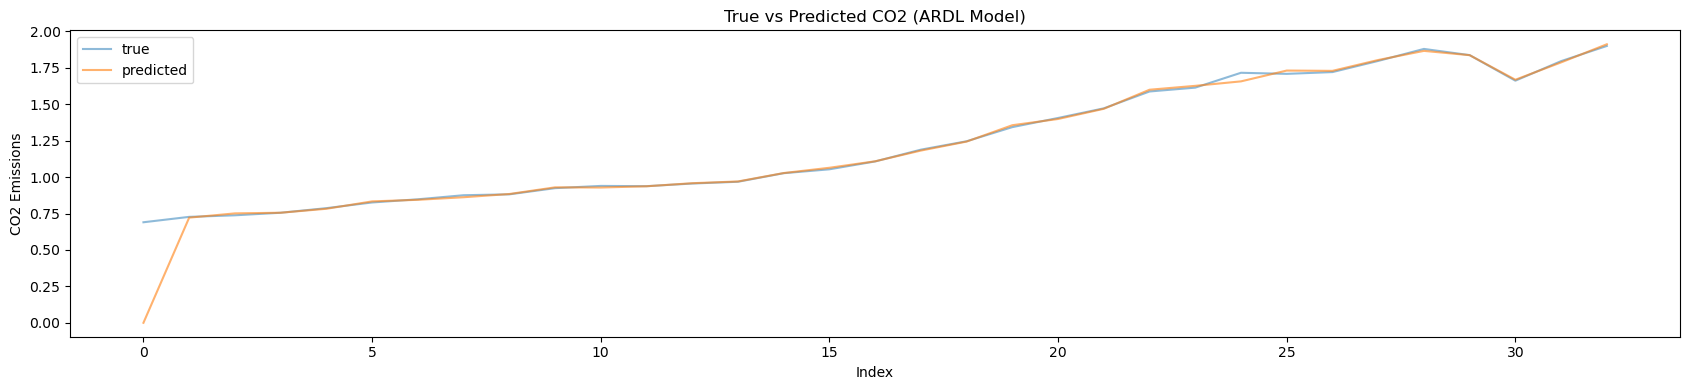

In [15]:
predicted_co2 = results.predict()
final=features[['GDP', 'RE', 'NRE', 'TO', 'HDI', 'ICT','CO2']]
final['pred_ardl']=np.float64(predicted_co2)
final['pred_ardl'].fillna(0,inplace=True)

fig, ax = plt.subplots(figsize=(17, 4))
final['CO2'].plot(ax=ax, label='true', alpha = 0.5)
final['pred_ardl'].plot(ax=ax, label='predicted', alpha=0.6)
ax.legend()
ax.set_title('True vs Predicted CO2 (ARDL Model)')
ax.set_xlabel('Index')
ax.set_ylabel('CO2 Emissions')
plt.tight_layout()
# Print the predicted CO2 value
#print("Predicted CO2 for next period:", predicted_co2)

In [16]:
# Decompose the independent variables into positive and negative changes
variables = ['GDP', 'RE', 'NRE', 'TO', 'HDI', 'ICT']
final_nardl = features[variables].copy()

for var in variables:
    final_nardl[f'{var}_pos'] = features[var].diff().clip(lower=0)
    final_nardl[f'{var}_neg'] = features[var].diff().clip(upper=0).abs()

# Drop the first row due to differencing
final_nardl = final_nardl.iloc[1:]

# Align the dependent variable (CO2) with the independent variables
y = features['CO2'].iloc[1:]  # Drop the first row to match indices with `final_nardl`

# Ensure the indices of `y` and `final_nardl` are aligned
y, final_nardl = y.align(final_nardl, join="inner")

# Select the independent variables
X = final_nardl[[f'{var}_pos' for var in variables] + [f'{var}_neg' for var in variables]]

# Fit the NARDL model
model_nardl = ARDL(y.values, lags=1, exog=X.values, order=1).fit()

# Print the summary of the model
print(model_nardl.summary())


                                           ARDL Model Results                                          
Dep. Variable:                                               y   No. Observations:                   32
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                 104.385
Method:                                        Conditional MLE   S.D. of innovations              0.008
Date:                                         Fri, 20 Dec 2024   AIC                           -154.769
Time:                                                 13:47:34   BIC                           -116.052
Sample:                                                      1   HQIC                          -142.148
                                                            32                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const     

Predicted CO2 for the last available period: 1.9002858304882668


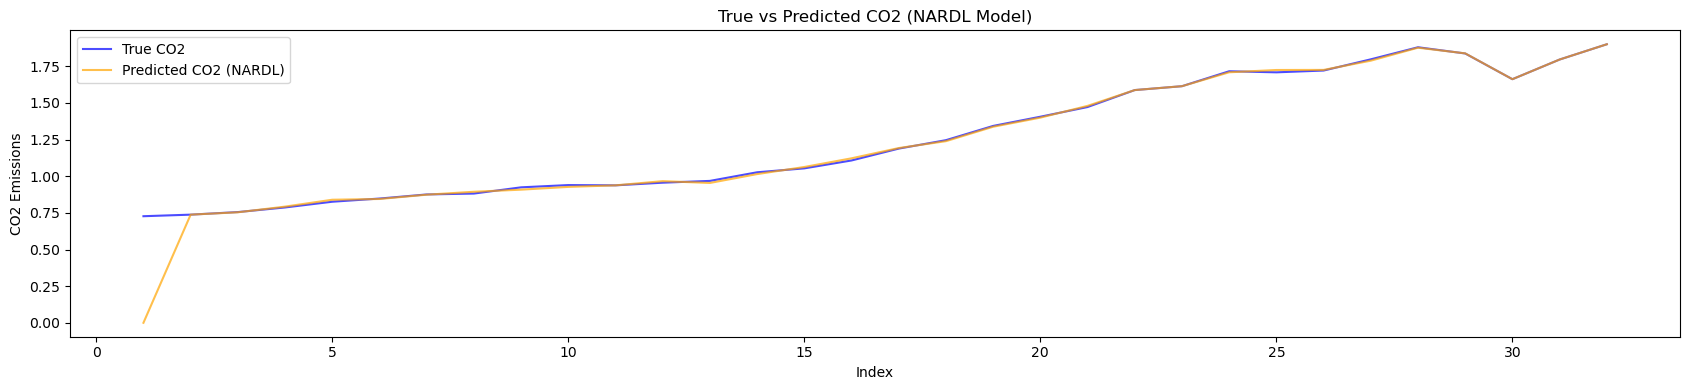

In [17]:
# Generate predictions from the fitted NARDL model
predicted_nardl_co2 = model_nardl.predict()

# Create a DataFrame to hold the actual and predicted values
final2 = features[['GDP', 'RE', 'NRE', 'TO', 'HDI', 'ICT', 'CO2']].iloc[1:].copy()  # Drop the first row to match differencing
final2['pred_nardl_co2'] = np.nan  # Initialize the column

# Align the predicted values with the final DataFrame
final2.loc[final2.index[-len(predicted_nardl_co2):], 'pred_nardl_co2'] = predicted_nardl_co2

# Fixing the FutureWarning by directly assigning the filled column
final2['pred_nardl_co2'] = final2['pred_nardl_co2'].fillna(0)

# Plot the true and predicted CO2 values
fig, ax = plt.subplots(figsize=(17, 4))
final2['CO2'].plot(ax=ax, label='True CO2', alpha=0.7, color='blue')
final2['pred_nardl_co2'].plot(ax=ax, label='Predicted CO2 (NARDL)', alpha=0.7, color='orange')
ax.legend()
ax.set_title('True vs Predicted CO2 (NARDL Model)')
ax.set_xlabel('Index')
ax.set_ylabel('CO2 Emissions')
plt.tight_layout()

# Optionally, print the last predicted CO2 value
# Ensure predicted_co2 is a numpy array or pandas series and use .iloc to access the last value
print("Predicted CO2 for the last available period:", predicted_nardl_co2[-1])  # Correct access method


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, RMSE for NARDL model
mae_nardl = mean_absolute_error(final2['CO2'], final2['pred_nardl_co2'])
mse_nardl = mean_squared_error(final2['CO2'], final2['pred_nardl_co2'])
rmse_nardl = np.sqrt(mse_nardl)

print("NARDL Model Performance:")
print("Mean Absolute Error (MAE):", mae_nardl)
print("Mean Squared Error (MSE):", mse_nardl)
print("Root Mean Squared Error (RMSE):", rmse_nardl)

# Calculate MAE, MSE, RMSE for ARDL model
mae_ardl = mean_absolute_error(final['CO2'], final['pred_ardl'])
mse_ardl = mean_squared_error(final['CO2'], final['pred_ardl'])
rmse_ardl = np.sqrt(mse_ardl)

print("\nARDL Model Performance:")
print("Mean Absolute Error (MAE):", mae_ardl)
print("Mean Squared Error (MSE):", mse_ardl)
print("Root Mean Squared Error (RMSE):", rmse_ardl)


NARDL Model Performance:
Mean Absolute Error (MAE): 0.02889199426002456
Mean Squared Error (MSE): 0.016589474109450907
Root Mean Squared Error (RMSE): 0.12880013241239663

ARDL Model Performance:
Mean Absolute Error (MAE): 0.029313455181425623
Mean Squared Error (MSE): 0.014608145565572647
Root Mean Squared Error (RMSE): 0.12086416162606949


In [19]:
features.to_csv('final.csv')
df.to_csv('actual.csv')